<h1>logistic regression</h1>
# setting training set labels to 50/50 %
    <p>160 class 0 samples by adding 70 class 0 records
it should adjust the features of the added function
<br> <li>adjust the added sample with percentage adjustment</li>
<br> <li>try to compute standard devation to remove some unnecessary features</li>
<h4>score: private --- ; public--</h4>

<h1>step1: <b>Pre-process training data</b></h1>

In [1]:
import random
import numpy as np

def randomInteger(a, b):
    return random.randint(a, b)

def adjustValue(value, percentageValue):    # 0 to xx.x%
    return_value = value
    plusORminus = randomInteger(0, 1) # 0 is plus, 1 is minus

    if (plusORminus == 0):
        return_value += value*(randomInteger(0, percentageValue)/1000)
    else:
        return_value -= value*(randomInteger(0, percentageValue)/1000)

    if (np.isnan(return_value)):
        print("NaN - value*(randomInteger(0, percentageValue)/1000): ", value*(randomInteger(0, percentageValue)/1000))
    
    return return_value 


In [2]:
# operation

adding_sample_on_class_0 = False
adjusted_percentage_range = 5.5 # best result is 5.5%

implement_feature_reduction = True
feature_reduction_threshold = 0.82


In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression


# df = pd.read_csv('./train.csv', index_col = True)
url = 'https://raw.githubusercontent.com/lucascheng24/comp4432ML-Dont-over-fit-II/main/train.csv'
df = pd.read_csv(url, index_col="id")
df['target'] = df['target'].astype(int)

parameters_dictionary = {}

df_class_1 = df[df['target'] == 1]
df_class_0 = df[df['target'] == 0]

sd_class_1 = df_class_1.std()
sd_class_2 = df_class_0.std()

remaining_features = {"target"}


In [4]:
df.rename(columns = {'index': 'id'})

print(len(df_class_1), ":", len(df_class_0))

for element in df:
    if element != "target":
        parameters_dictionary.update({element : df[element]})



label_dictionary = {'label': df['target']}

df_X = pd.DataFrame(data = parameters_dictionary)
df_Y = pd.DataFrame(data = label_dictionary)


nan_in_df = df_X.isnull().sum().sum()
 
# printing the number of values present in
# the whole dataframe
print('Number of NaN values present: ' + str(nan_in_df))

160 : 90
Number of NaN values present: 0


In [14]:
# data scaling
from sklearn.preprocessing import StandardScaler

pc_num = 250


x_scaled = StandardScaler().fit_transform(df_X)

In [15]:
def getPCList(pc_num):
    rt_list = []

    for i in range(pc_num):

        pc_name = 'PC'
        pc_name = pc_name.join(str(i))

        rt_list.append(pc_name)

    return rt_list

In [17]:
def getPDict(pc_num):
    rt_dict = {}

    for i in range(pc_num):

        pc_name = 'PC'
        pc_name = pc_name.join(str(i))

        rt_dict[i] = pc_name

    return rt_dict

In [16]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = pc_num)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=getPCList(pc_num))

Shape before PCA:  (250, 300)
Shape after PCA:  (250, 250)


In [19]:
target_names = getPDict(pc_num)
 
pca_df['target'] = df_Y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df

,0,1,2,3,4,5,6,7,8,9,...,2PC4PC1,2PC4PC2,2PC4PC3,2PC4PC4,2PC4PC5,2PC4PC6,2PC4PC7,2PC4PC8,2PC4PC9,target
0,-1.451806,-1.302013,0.929849,3.614762,1.001253,0.733862,-2.966808,6.767494,-2.234376,0.018679,...,0.161860,0.125388,0.126982,-0.305015,-0.097073,0.035350,0.196047,0.062942,9.151757e-16,1
1,-1.143144,1.530443,1.268306,-0.858558,-3.028751,3.990545,1.689014,-1.741372,0.876148,1.399934,...,0.243701,-0.122317,-0.141487,-0.398749,-0.126254,0.209892,-0.036553,0.086236,9.151757e-16,0
2,-1.341182,0.290420,3.582311,-1.416365,-1.410369,3.188019,-3.795573,1.728137,0.222600,-1.929414,...,0.088609,-0.130018,0.253319,0.161760,0.017291,0.027423,-0.194246,0.127862,9.151757e-16,1
3,1.468986,-1.619920,0.197359,-1.796203,1.241586,-3.061750,1.352171,-3.034242,-0.586492,0.481847,...,0.200240,0.324829,-0.203519,-0.177007,0.102787,-0.012642,-0.144554,0.060784,9.151757e-16,1
4,-0.885177,-1.355451,0.426658,2.835513,-1.859011,3.507609,-2.139399,1.463850,-3.954501,0.333825,...,0.036911,0.040737,-0.165763,-0.058593,0.067721,-0.014604,0.223213,0.018669,9.151757e-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.012516,1.230112,2.122698,2.274354,2.627187,-3.531633,2.626323,-2.152814,-0.259479,-0.142783,...,-0.220031,0.113624,0.115872,-0.196949,-0.105031,-0.038753,-0.079726,-0.052180,9.151757e-16,0
246,-3.784520,3.687391,-2.552099,1.362634,2.437746,1.037908,-2.112672,0.303949,2.674172,-4.097984,...,-0.283822,0.109002,0.116779,-0.024049,-0.022342,0.027855,-0.255875,-0.089342,9.151757e-16,0
247,3.298851,1.442573,4.456614,-2.066251,0.770161,-1.354277,1.931393,0.671409,-1.917626,1.255566,...,-0.015218,-0.067186,-0.074508,0.005625,0.095290,-0.090454,-0.019673,0.004639,9.151757e-16,0
248,2.830923,2.815914,0.249843,1.612942,-2.638277,5.894114,-0.305068,-1.932747,0.882253,1.120805,...,-0.087463,0.053777,-0.069662,0.124759,-0.001402,0.157165,-0.140538,-0.025261,9.151757e-16,1


In [20]:
pca.explained_variance_

array([4.26392172e+00, 4.19793425e+00, 4.06175451e+00, 3.96087172e+00,
       3.93688572e+00, 3.81701892e+00, 3.74443733e+00, 3.69802043e+00,
       3.65059900e+00, 3.55971801e+00, 3.52645316e+00, 3.51109357e+00,
       3.47481825e+00, 3.43612527e+00, 3.37863467e+00, 3.35855511e+00,
       3.25824441e+00, 3.22620876e+00, 3.16162606e+00, 3.13918617e+00,
       3.08837876e+00, 3.04864136e+00, 3.03647287e+00, 2.99337741e+00,
       2.98151274e+00, 2.90136030e+00, 2.89246203e+00, 2.85310579e+00,
       2.79556146e+00, 2.77754873e+00, 2.74200585e+00, 2.70650607e+00,
       2.70175549e+00, 2.66441526e+00, 2.61815166e+00, 2.59557211e+00,
       2.56921805e+00, 2.53819007e+00, 2.52225942e+00, 2.49881936e+00,
       2.46811785e+00, 2.41375372e+00, 2.40062364e+00, 2.37838618e+00,
       2.34847171e+00, 2.34757096e+00, 2.30389294e+00, 2.25915412e+00,
       2.24644963e+00, 2.23537728e+00, 2.20882529e+00, 2.17745974e+00,
       2.14842281e+00, 2.13797933e+00, 2.07169622e+00, 2.05747294e+00,
      

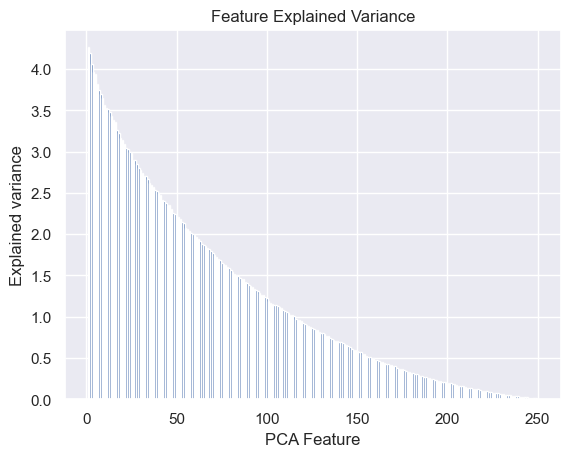

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA


sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=pc_num)
 
# Fit and transform data
pca.fit_transform(x_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [27]:
# implement logistic regression


###
#   function: predict_logistic_regression
#       @param: input_x => training dataset features
#       @param: input_y => training dataset label
#       @param: input_z => testing dataset records (features only)
#   
#   output: array/list of predicted result of input_z
###
model = LogisticRegression(max_iter=10000)

def predict_logistic_regression(input_x, input_y, input_z):
    # build the model based on training data
    model.fit(input_x, input_y)

    # insert testing dataset to get the predicted output
    predicted_values = model.predict(input_z)

    return predicted_values
    


In [25]:
import pandas as pd
from sklearn.decomposition import PCA
 
# Reduce from 4 to 2 features with PCA
pca = PCA(n_components=2)
 
# Fit and transform data
pca_features = pca.fit_transform(x_scaled)
 
# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
 
# map target names to PCA features   
target_names = {
    0:'1',
    1:'0', 
}
 
pca_df['target'] = df_Y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df.head()

,PC1,PC2,target
0,-1.451806,-1.302013,0
1,-1.143144,1.530443,1
2,-1.341182,0.290420,0
3,1.468986,-1.619920,0
4,-0.885177,-1.355451,0


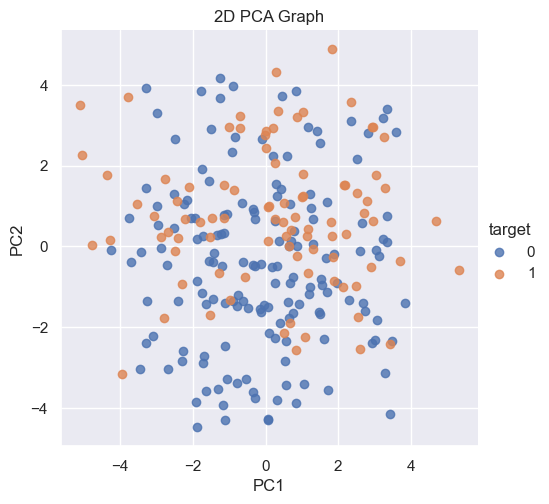

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

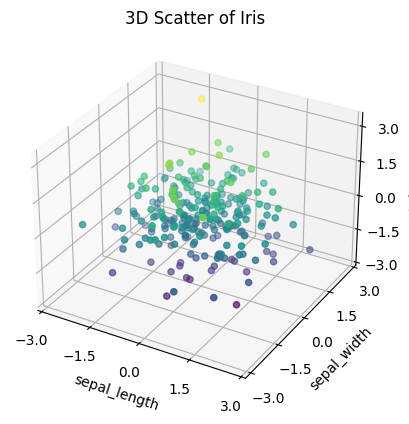

In [27]:
import numpy as np
import matplotlib.pyplot as plt
 
from mpl_toolkits import mplot3d
plt.style.use('default')
 
# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Plot scaled features
xdata = x_scaled[:,0]
ydata = x_scaled[:,1]
zdata = x_scaled[:,2]
 
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')
 
# Plot title of graph
plt.title(f'3D Scatter of Iris')
 
# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
 
# Plot x, y, z labels
ax.set_xlabel('sepal_length', rotation=150)
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length', rotation=60)
plt.show()

In [28]:
#  Applying 5-fold-cross-validation
k = 5
kf = KFold(n_splits = k, random_state = None)


# A function to run 5-fold cross validation on polynomial_logistic_regression
def kFold_logistic_regression(input_X, input_Y):

    validation_f1_score = []

    for train_index , validation_index in kf.split(input_X):

        # print('Start model fitting, k=', train_index[0], ' - ', train_index[-1], ' ...')

        X_train , X_valid = input_X.iloc[train_index,:], input_X.iloc[validation_index,:]
        y_train, y_valid = input_Y.iloc[train_index], input_Y.iloc[validation_index]

        # print('X_train: ', X_train)

        y_train = y_train.to_numpy().ravel()
        y_valid = y_valid.to_numpy().ravel()
        
        pred_testValues = predict_logistic_regression(X_train, y_train, X_valid)

        # count the f1 score(true records / predicted records)
        valid_f1 = f1_score(y_valid, pred_testValues)
        validation_f1_score.append(valid_f1)

    return validation_f1_score


In [30]:
mean_f1 = []

testing_f1_score = kFold_logistic_regression(df_X, df_Y)


# print('testing set F1 score (poly 2 to 12) under 5-fold-cross-validation: ')
for item in testing_f1_score:
    print(item)
    if item != 0.0:
        mean_f1.append(item)
    
np.mean(mean_f1)



0.0
0.33333333333333337
0.924731182795699
0.8372093023255813
0.717948717948718


0.703305634100833

<h3>Real prediction on testing data</h3>

In [31]:
import csv


url_test = 'https://raw.githubusercontent.com/lucascheng24/comp4432ML-Dont-over-fit-II/main/test.csv'
df_test = pd.read_csv(url_test, index_col="id")

# implement feature reduction
if implement_feature_reduction == True:
    test_features_list = list_remainingFeatures
    if 'target' in test_features_list:
        test_features_list.remove('target')
        df_test = df_test[test_features_list]

pred_values = predict_logistic_regression(df_X, df_Y, df_test)


specific_req_str = ''

if adding_sample_on_class_0:
    specific_req_str += '_' + str(adjusted_percentage_range).replace(".", "d") + 'pct'

if implement_feature_reduction:
    specific_req_str += '_threshold_' + str(feature_reduction_threshold).replace(".", "d")




filePath = '../result_folder/logisticV6' + specific_req_str +'.csv'


print("filePath:", filePath)





filePath: ../result_folder/logisticV6_threshold_0d82.csv


c:\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
with open(filePath, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["id", "target"])
    for i in range(250, 20000):
        writer.writerow([i, pred_values[i-250]])
    file.close()